# Probability distributions
A probability distribution describe the probabilities of all possible outcomes for a random variable Y. In the discrete case it can be represented as a table or graph and in the continuous case is the area under the curve of a probability. 

## Probability distribution class
Let's define a simple probability distribution class to explore how the probabilities are calculated

In [59]:
import random
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

class ProbabilityDistribution:
    
    def __init__(self, sample_space):
        self.sample_space = sample_space
        self.distribution = {}
        for event in sample_space:
            self.distribution[event] = self.calculateProbability(event)
        self.experiments = 0
        print(self.distribution)
    
    def estimate(self, observations):
        distribution = {}
        for event in observations:
            if event in distribution:
                distribution[event] += 1
            else:
                distribution[event] = 1
                
        for event, value in distribution.items():
            distribution[event] /= len(observations)
        return distribution
    
    def calculateProbability(self, y):
        if y in self.sample_space and len(self.sample_space) > 0:
            return 1/len(self.sample_space)
        return 0
    
    def probabilityOfSampleSpace(self):
        sum = 0
        for event in self.sample_space:
            sum += self.calculateProbability(event)
        return sum
    
    def runEvent(self, variance_factor = 0.01):
        observation = random.random()
        accumulate = 0
        for event, probability in self.distribution.items():
            accumulate += probability
            if accumulate >= observation:
                accumulate = 0
                return event
        return self.runEvent(variance_factor)
                
            
    def simulateExperiment(self, variance_factor  = 0.01):
        value = self.runEvent()
        self.experiments += 1
        if self.experiments == len(self.sample_space):
            self.experiments = 0
            self.generator = None
        return value
    
    def plot(self, order_labels = None):
        labels = []
        probabilities = []
        for event, probability in self.distribution.items():
            labels.append(event)
            probabilities.append(probability)
        
        if order_labels is not None:
            labels.sort(key = order_labels)
            probabilities = []
            for l in labels:
                probabilities.append(self.distribution[l])
        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars
        fig, ax = plt.subplots()
        rects = ax.bar(x, probabilities, width, label = 'Probability')
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Probabilities')
        ax.set_title('Probability distribution')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        ax = self.autolabel(rects, ax)
        fig.tight_layout()
        plt.ylim(0, max(probabilities)*1.2)
        plt.show()
        
    def autolabel(self, rects, ax):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = self.truncate(rect.get_height(), 3)
            ax.annotate(str(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        return ax

    def truncate(self, number, digits):
        stepper = 10.0 ** digits
        return math.trunc(stepper * number) / stepper
    
    def expectedValue(self):
        expected_value = 0
        for k, v in self.distribution.items():
            if isinstance(k, int):
                expected_value += k*v
        #expected_value = np.sum([y*py for y, py in self.distribution.items()])
        return expected_value
    
    def variance(self):
        return None

The probability distribution class defined before recieves a sample space and defines a function to compute teh probability, we can extend this class to explore different probabilities, for example let's define a probability distribution for a Dice toss:

In [60]:
dice = ProbabilityDistribution([1,2,3,4,5,6])
print(dice.calculateProbability(2))
print(dice.calculateProbability(0))
print(dice.probabilityOfSampleSpace())
print(dice.expectedValue())

{1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666}
0.16666666666666666
0
0.9999999999999999
3.5


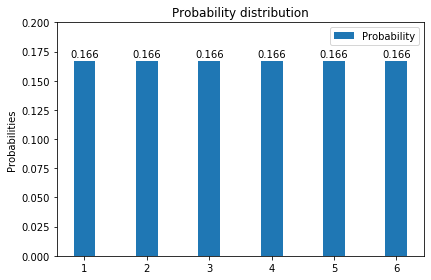

In [3]:
dice.plot()

In [62]:
coin = ProbabilityDistribution(['Cara', 'Cruz'])
print(coin.calculateProbability('Cara'))
print(coin.calculateProbability('Canto'))
print(coin.probabilityOfSampleSpace())
print(coin.expectedValue())
print(coin.variance())

{'Cara': 0.5, 'Cruz': 0.5}
0.5
0
1.0
0
None


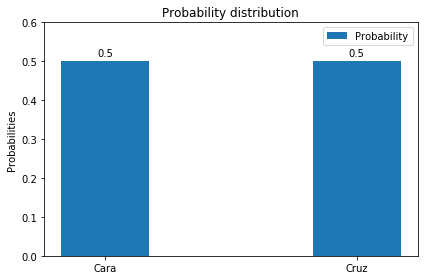

In [5]:
coin.plot()

In [82]:
observations = []
for i in range(12):
    roll = dice.simulateExperiment() 
    observations.append(roll)
print(observations)
print(dice.estimate(observations))

[3, 4, 6, 5, 3, 2, 3, 4, 1, 6, 1, 2]
{3: 0.25, 4: 0.16666666666666666, 6: 0.16666666666666666, 5: 0.08333333333333333, 2: 0.16666666666666666, 1: 0.16666666666666666}


In [83]:
observations = []
for i in range(100):
    roll = dice.simulateExperiment() 
    observations.append(roll)
print(dice.estimate(observations))

{5: 0.17, 1: 0.15, 3: 0.13, 2: 0.19, 4: 0.16, 6: 0.2}


In [84]:
observations = []
for i in range(1000):
    roll = dice.simulateExperiment() 
    observations.append(roll)
print(dice.estimate(observations))

{2: 0.169, 1: 0.173, 4: 0.15, 6: 0.162, 5: 0.186, 3: 0.16}


In [85]:
print(coin.simulateExperiment())

Cruz


In [86]:
observations = []
for i in range(100):
    roll = coin.simulateExperiment() 
    observations.append(roll)
print(observations)
print(coin.estimate(observations))

['Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cruz', 'Cruz', 'Cara', 'Cara', 'Cruz', 'Cruz', 'Cruz', 'Cara', 'Cara', 'Cruz', 'Cruz', 'Cruz', 'Cruz', 'Cara', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cruz', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cruz', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cara', 'Cara']
{'Cruz': 0.6, 'Cara': 0.4}


In [87]:
observations = []
for i in range(1000):
    roll = coin.simulateExperiment() 
    observations.append(roll)
print(coin.estimate(observations))

{'Cruz': 0.485, 'Cara': 0.515}


In [88]:
observations = []
for i in range(100000):
    roll = coin.simulateExperiment() 
    observations.append(roll)
print(coin.estimate(observations))

{'Cruz': 0.4982, 'Cara': 0.5018}


## Biased coin
Let's create a probability distribution with an unfail coin

In [89]:
class biasedCoin(ProbabilityDistribution):
    
    def calculateProbability(self, y):
        if y == 'Cara':
            return 0.9
        if y == 'Cruz':
            return 0.1
        return 0

In [90]:
unfair_coin = biasedCoin(['Cara', 'Cruz'])
print(unfair_coin.calculateProbability('Cara'))
print(unfair_coin.calculateProbability('Canto'))
print(unfair_coin.probabilityOfSampleSpace())

{'Cara': 0.9, 'Cruz': 0.1}
0.9
0
1.0


In [91]:
print(unfair_coin.simulateExperiment())

Cruz


In [92]:
observations = []
for i in range(100):
    roll = unfair_coin.simulateExperiment() 
    observations.append(roll)
print(observations)
print(unfair_coin.estimate(observations))

['Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cruz', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cruz', 'Cruz', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cruz', 'Cara', 'Cara']
{'Cara': 0.86, 'Cruz': 0.14}


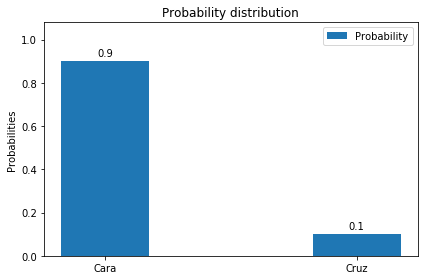

In [93]:
unfair_coin.plot()

## Count tools
Let's define a simple class to have the coubt tools to approximate distributions

In [94]:
class CountTools:
    
    @staticmethod
    def permutations(n, r):
        permutations = math.factorial(n)/(math.factorial(n - r))
        return permutations
    
    @staticmethod
    def combinations(n, r):
        return CountTools.permutations(n, r)/math.factorial(r)

## Binomial distribution
Let's extend our class to model a binomial distribution

In [95]:
class BinomialDistribution(ProbabilityDistribution):
    
    def __init__(self, n, p):
        self.sample_space = range(n + 1)
        self.n = n
        self.p = p
        self.q = 1 - p
        self.distribution = {}
        for event in self.sample_space:
            self.distribution[event] = self.calculateProbability(event)
        self.experiments = 0
        print(self.distribution)
    
    def calculateProbability(self, y):
        #combinations = CountTools.combinations(self.n, y)
        exp = self.p**y * self.q**(self.n -y)
        return self.getCombinations(self.n, y)*exp
    
    def getCombinations(self, n, r):
        return (np.math.factorial(n)/(np.math.factorial(n - r)))/np.math.factorial(r)
    
    def expectedValue(self):
        return self.n*self.p
    
    def variance(self):
        return self.n*self.p*self.q

{0: 0.3486784401000001, 1: 0.38742048900000015, 2: 0.1937102445000001, 3: 0.057395628000000025, 4: 0.011160261000000003, 5: 0.0014880348000000005, 6: 0.00013778100000000007, 7: 8.748000000000005e-06, 8: 3.6450000000000023e-07, 9: 9.000000000000004e-09, 10: 1.0000000000000006e-10}


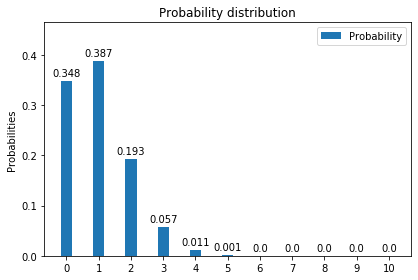

1


In [107]:
binomial_01 = BinomialDistribution(10, 0.1)
binomial_01.plot()
print(binomial_01.runEvent())

In [113]:
infected = binomial_01.runEvent()
executions = 1
while infected < 9:
    executions += 1
    infected = binomial_01.runEvent()
print(executions)

103082335


In [80]:
print("Expected value general " + str(binomial_01.expectedValue()))
print("Sample space probability: " + str(binomial_01.probabilityOfSampleSpace()))
print("Variance: " + str(binomial_01.variance()))

Expected value general 1.0
Sample space probability: 1.0
Variance: 0.9


{0: 2.6561398887587544e-05, 1: 0.0002951266543065283, 2: 0.0016231965986859057, 3: 0.005891602469304398, 4: 0.015874595542292404, 5: 0.03386580382355713, 6: 0.059578728948850516, 7: 0.08889524636812617, 8: 0.11482302655882966, 9: 0.13041627707916453, 10: 0.13186534682448858, 11: 0.11987758802226235, 12: 0.09878801235167915, 13: 0.07430209476023732, 14: 0.05130382733444958, 15: 0.03268243815379752, 16: 0.019291716965783256, 17: 0.01059153088317512, 18: 0.005426525082120586, 19: 0.002602193314233264, 20: 0.0011709869914049687, 21: 0.0004956558693777647, 22: 0.00019776168525678488, 23: 7.451889589386095e-05, 24: 2.6564606406607846e-05, 25: 8.972933719565316e-06, 26: 2.875940294732474e-06, 27: 8.758007481901359e-07, 28: 2.53704184991587e-07, 29: 6.998736137698954e-08, 30: 1.8404083917652798e-08, 31: 4.617512094034753e-09, 32: 1.1062789391958262e-09, 33: 2.532894540919737e-10, 34: 5.545880203974587e-11, 35: 1.1619939474994372e-11, 36: 2.331160697143933e-12, 37: 4.4803088473637147e-13, 38: 8

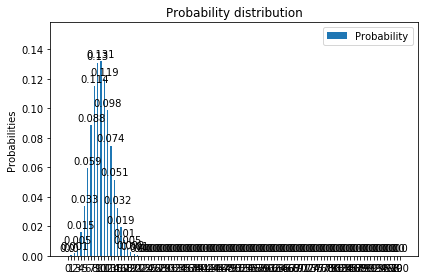

In [81]:
binomial_100 = BinomialDistribution(100, 0.1)
binomial_100.plot()

In [45]:
print("Expected value general " + str(binomial_100.expectedValue()))
print("Expected value formula " + str(binomial_100.expectedValue()))
print("Sample space probability: " + str(binomial_100.probabilityOfSampleSpace()))

Expected value general 10.0
Expected value formula 10.0
Sample space probability: 1.0000000000000024


{0: 0.0009765625, 1: 0.009765625, 2: 0.0439453125, 3: 0.1171875, 4: 0.205078125, 5: 0.24609375, 6: 0.205078125, 7: 0.1171875, 8: 0.0439453125, 9: 0.009765625, 10: 0.0009765625}


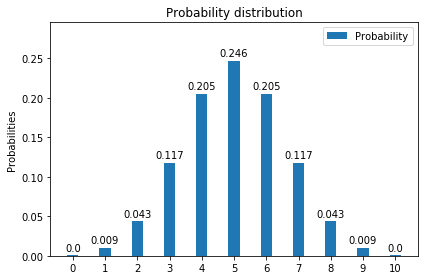

In [17]:
binomial_02 = BinomialDistribution(10, 0.5)
binomial_02.plot()

In [18]:
binomial_02.expectedValue()

5.0

{0: 9.5367431640625e-07, 1: 1.9073486328125e-05, 2: 0.0001811981201171875, 3: 0.001087188720703125, 4: 0.004620552062988281, 5: 0.0147857666015625, 6: 0.03696441650390625, 7: 0.0739288330078125, 8: 0.12013435363769531, 9: 0.16017913818359375, 10: 0.17619705200195312, 11: 0.16017913818359375, 12: 0.12013435363769531, 13: 0.0739288330078125, 14: 0.03696441650390625, 15: 0.0147857666015625, 16: 0.004620552062988281, 17: 0.001087188720703125, 18: 0.0001811981201171875, 19: 1.9073486328125e-05, 20: 9.5367431640625e-07}


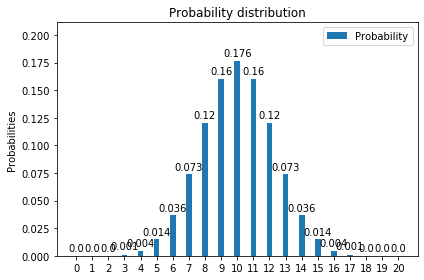

In [295]:
binomial_03 = BinomialDistribution(20, 0.5)
binomial_03.plot()

In [296]:
observations = []
for i in range(100000):
    roll = binomial_03.simulateExperiment() 
    observations.append(roll)
print(binomial_03.estimate(observations))
print(binomial_03.distribution)

{9: 0.16029, 8: 0.1211, 13: 0.07466, 7: 0.07391, 10: 0.17636, 11: 0.15996, 12: 0.11877, 14: 0.03744, 5: 0.01444, 16: 0.00452, 6: 0.03645, 15: 0.01481, 4: 0.00461, 17: 0.00113, 3: 0.00105, 2: 0.00026, 18: 0.0002, 19: 3e-05, 1: 1e-05}
{0: 9.5367431640625e-07, 1: 1.9073486328125e-05, 2: 0.0001811981201171875, 3: 0.001087188720703125, 4: 0.004620552062988281, 5: 0.0147857666015625, 6: 0.03696441650390625, 7: 0.0739288330078125, 8: 0.12013435363769531, 9: 0.16017913818359375, 10: 0.17619705200195312, 11: 0.16017913818359375, 12: 0.12013435363769531, 13: 0.0739288330078125, 14: 0.03696441650390625, 15: 0.0147857666015625, 16: 0.004620552062988281, 17: 0.001087188720703125, 18: 0.0001811981201171875, 19: 1.9073486328125e-05, 20: 9.5367431640625e-07}


{0: 9.5367431640625e-07, 1: 1.9073486328125e-05, 2: 0.0001811981201171875, 3: 0.001087188720703125, 4: 0.004620552062988281, 5: 0.0147857666015625, 6: 0.03696441650390625, 7: 0.0739288330078125, 8: 0.12013435363769531, 9: 0.16017913818359375, 10: 0.17619705200195312, 11: 0.16017913818359375, 12: 0.12013435363769531, 13: 0.0739288330078125, 14: 0.03696441650390625, 15: 0.0147857666015625, 16: 0.004620552062988281, 17: 0.001087188720703125, 18: 0.0001811981201171875, 19: 1.9073486328125e-05, 20: 9.5367431640625e-07}


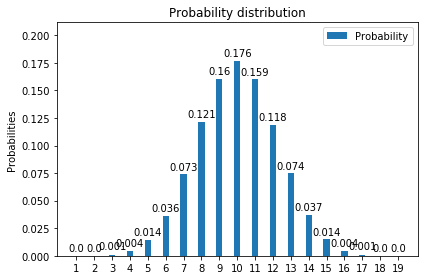

In [297]:
binomial_04 = BinomialDistribution(20, 0.5)
binomial_04.distribution = binomial_03.estimate(observations)
binomial_04.plot(order_labels = lambda x: int(x))

## Binomial example
Experience has shown that 30\% of all persons afflicted by a certain illness recover. A drug company has developed a new medication. Ten people with the illness were selected at random and received the medication; nine recovered shortly thereafter. Suppose that the medication was absolutely worthless. What is the probability that at least nine of ten receiving the medication will recover?

In [298]:
binomial_example = BinomialDistribution(10, 0.3)

{0: 0.028247524899999984, 1: 0.12106082099999993, 2: 0.23347444049999985, 3: 0.2668279319999999, 4: 0.20012094899999994, 5: 0.10291934519999994, 6: 0.03675690899999998, 7: 0.009001691999999995, 8: 0.0014467004999999993, 9: 0.00013778099999999993, 10: 5.9048999999999975e-06}


In [302]:
prob_9 = binomial_example.calculateProbability(9)
print(prob_9)

0.00013778099999999993


In [304]:
prob_10 = binomial_example.calculateProbability(10)
print(prob_10)

5.9048999999999975e-06


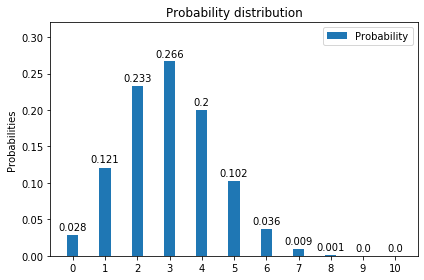

In [305]:
binomial_example.plot()

In [306]:
print(prob_9 + prob_10)

0.00014368589999999993


In [308]:
binomial_dice = BinomialDistribution(4, 1/6)

{0: 0.4822530864197532, 1: 0.3858024691358025, 2: 0.11574074074074076, 3: 0.015432098765432096, 4: 0.0007716049382716048}


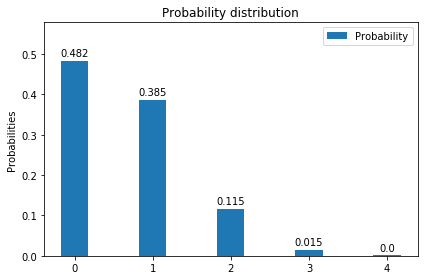

In [309]:
binomial_dice.plot()

In [310]:
1/1269

0.0007880220646178094

In [312]:
print(binomial_example.probabilityOfSampleSpace())

0.9999999999999992


In [15]:
e = BinomialDistribution(4, 0.8)
e.calculateProbability(2)

{0: 0.0015999999999999986, 1: 0.025599999999999984, 2: 0.15359999999999996, 3: 0.4096, 4: 0.4096000000000001}


0.15359999999999996

**Exercise:** Write down the code for a Geometric distribution and use it to solve the following problem: Then the probability of engine malfunction, $p = 0.02$, during any randomly observed one-hour interval of operation might be the same as for any other one-hour interval. The length of time prior to engine malfunction is the number of one-hour intervals, Y , until the first malfunction.

In [72]:
def printDistribution(probability_distribution):
    probability_distribution.plot()
    print("Expected value " + str(probability_distribution.expectedValue()))
    print("Variance " + str(probability_distribution.variance()))

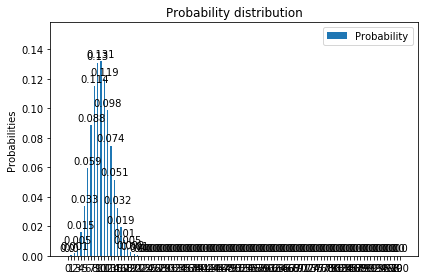

Expected value 10.0
Variance 9.0


In [73]:
printDistribution(binomial_100)

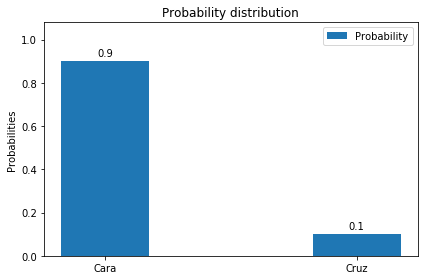

Expected value 0
Variance None


In [74]:
printDistribution(unfair_coin)

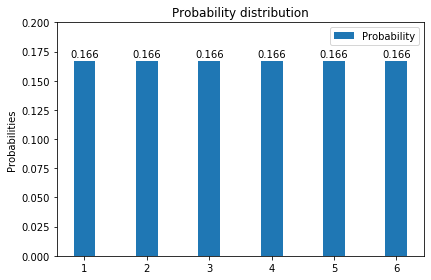

Expected value 3.5
Variance None


In [75]:
printDistribution(dice)